In [1]:
import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot
from math import *

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
    
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")

print(feature_list)


(0.32, ' seconds elapsed')
['Pathogen_Ala', 'Pathogen_Arg', 'Pathogen_Asn', 'Pathogen_Asp', 'Pathogen_Cys', 'Pathogen_Gln', 'Pathogen_Glu', 'Pathogen_Gly', 'Pathogen_His', 'Pathogen_Ile', 'Pathogen_Leu', 'Pathogen_Lys', 'Pathogen_Met', 'Pathogen_Phe', 'Pathogen_Pro', 'Pathogen_Ser', 'Pathogen_Thr', 'Pathogen_Trp', 'Pathogen_Tyr', 'Pathogen_Val', 'Host_Ala', 'Host_Arg', 'Host_Asn', 'Host_Asp', 'Host_Cys', 'Host_Gln', 'Host_Glu', 'Host_Gly', 'Host_His', 'Host_Ile', 'Host_Leu', 'Host_Lys', 'Host_Met', 'Host_Phe', 'Host_Pro', 'Host_Ser', 'Host_Thr', 'Host_Trp', 'Host_Tyr', 'Host_Val', 'GO_Similarity_Score']


('Accuracy:', 0.5536062378167641, ' Max_dept=:', 1, ' num_boost=:', 0)

('Accuracy:', 0.44639376218323584, ' Max_dept=:', 1, ' num_boost=:', 10)

('Accuracy:', 0.47953216374269003, ' Max_dept=:', 1, ' num_boost=:', 20)

('Accuracy:', 0.4873294346978557, ' Max_dept=:', 1, ' num_boost=:', 30)

('Accuracy:', 0.50682261208577, ' Max_dept=:', 1, ' num_boost=:', 40)

('Accuracy:', 0.5263157894736842, ' Max_dept=:', 1, ' num_boost=:', 50)

('Accuracy:', 0.5419103313840156, ' Max_dept=:', 1, ' num_boost=:', 60)

('Accuracy:', 0.5458089668615984, ' Max_dept=:', 1, ' num_boost=:', 70)

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 1, ' num_boost=:', 80)

('Accuracy:', 0.557504873294347, ' Max_dept=:', 1, ' num_boost=:', 90)

('Accuracy:', 0.557504873294347, ' Max_dept=:', 1, ' num_boost=:', 100)

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 2, ' num_boost=:', 0)

('Accuracy:', 0.4853801169590643, ' Max_dept=:', 2, ' num_boost=:', 10)

('Accuracy:', 0.5165692007797271, ' Max_dept=:', 2, ' 

('Accuracy:', 0.48148148148148145, ' Max_dept=:', 11, ' num_boost=:', 30)

('Accuracy:', 0.4834307992202729, ' Max_dept=:', 11, ' num_boost=:', 40)

('Accuracy:', 0.4775828460038986, ' Max_dept=:', 11, ' num_boost=:', 50)

('Accuracy:', 0.48148148148148145, ' Max_dept=:', 11, ' num_boost=:', 60)

('Accuracy:', 0.4834307992202729, ' Max_dept=:', 11, ' num_boost=:', 70)

('Accuracy:', 0.48148148148148145, ' Max_dept=:', 11, ' num_boost=:', 80)

('Accuracy:', 0.4834307992202729, ' Max_dept=:', 11, ' num_boost=:', 90)

('Accuracy:', 0.4834307992202729, ' Max_dept=:', 11, ' num_boost=:', 100)

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 12, ' num_boost=:', 0)

('Accuracy:', 0.5048732943469786, ' Max_dept=:', 12, ' num_boost=:', 10)

('Accuracy:', 0.5087719298245614, ' Max_dept=:', 12, ' num_boost=:', 20)

('Accuracy:', 0.50682261208577, ' Max_dept=:', 12, ' num_boost=:', 30)

('Accuracy:', 0.50682261208577, ' Max_dept=:', 12, ' num_boost=:', 40)

('Accuracy:', 0.5029239766081871, ' Max

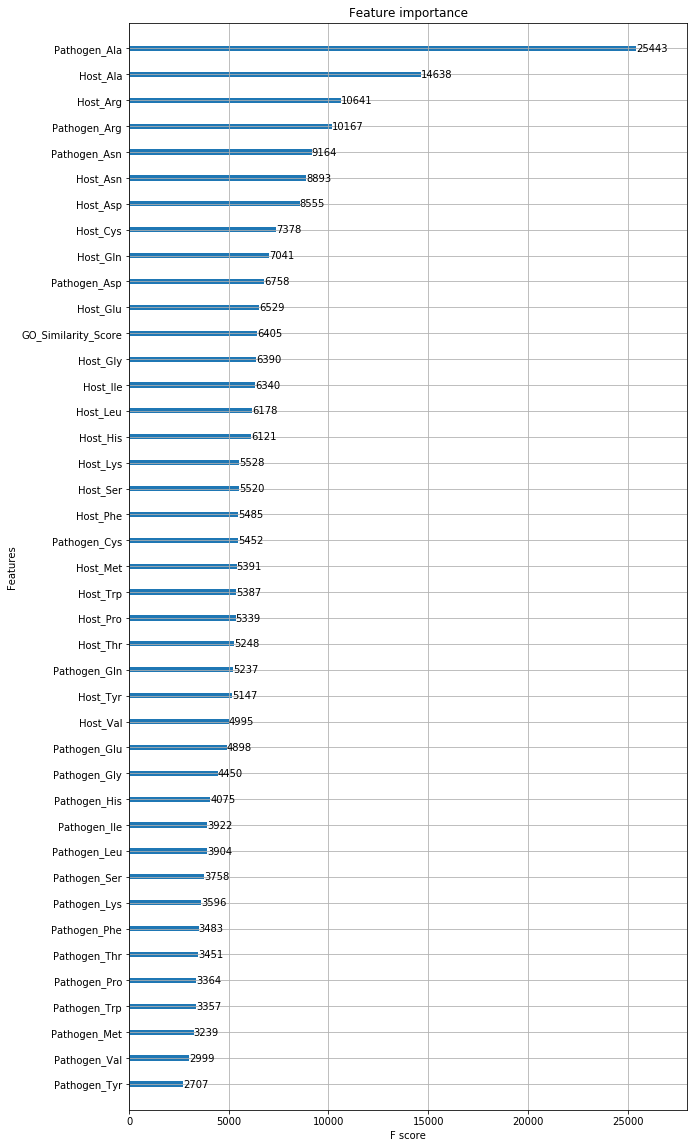

In [2]:
#Check for overfitting
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()
bst=None;
for depth in  range(1, 21):
        
        for num_boost in xrange(0,101,10):

            dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
            dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
            # specify parameters via map
            #param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
            param = {'silent':1,'max_depth':depth}
            num_round = num_boost
            bst = xgb.train(param, dtrain, num_round)
            # make prediction
            predictions = bst.predict(dtest)

           

            


            #print(confusion_matrix(test_labels,predictions.round()))  
            #print(classification_report(test_labels,predictions.round()))  


            # Model Accuracy, how often is the classifier correct?
            print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()), " Max_dept=:",depth, " num_boost=:",num_boost)
            #print("Max_dept=:",depth)
            #print("num_boost=:",num_boost)
            print
            
end = time.time()
print(round(end - start,2)," seconds elapsed")
# plot feature importance on last iteration
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 1, ' num_boost=:', 0)

('Accuracy:', 0.4502923976608187, ' Max_dept=:', 1, ' num_boost=:', 10)

('Accuracy:', 0.4678362573099415, ' Max_dept=:', 1, ' num_boost=:', 20)

('Accuracy:', 0.5087719298245614, ' Max_dept=:', 1, ' num_boost=:', 30)

('Accuracy:', 0.5321637426900585, ' Max_dept=:', 1, ' num_boost=:', 40)

('Accuracy:', 0.5419103313840156, ' Max_dept=:', 1, ' num_boost=:', 50)

('Accuracy:', 0.5419103313840156, ' Max_dept=:', 1, ' num_boost=:', 60)

('Accuracy:', 0.5497076023391813, ' Max_dept=:', 1, ' num_boost=:', 70)

('Accuracy:', 0.5692007797270955, ' Max_dept=:', 1, ' num_boost=:', 80)

('Accuracy:', 0.5789473684210527, ' Max_dept=:', 1, ' num_boost=:', 90)

('Accuracy:', 0.5769980506822612, ' Max_dept=:', 1, ' num_boost=:', 100)

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 2, ' num_boost=:', 0)

('Accuracy:', 0.4951267056530214, ' Max_dept=:', 2, ' num_boost=:', 10)

('Accuracy:', 0.49317738791423, ' Max_dept=:', 2, ' 

('Accuracy:', 0.5633528265107213, ' Max_dept=:', 11, ' num_boost=:', 30)

('Accuracy:', 0.5672514619883041, ' Max_dept=:', 11, ' num_boost=:', 40)

('Accuracy:', 0.5614035087719298, ' Max_dept=:', 11, ' num_boost=:', 50)

('Accuracy:', 0.557504873294347, ' Max_dept=:', 11, ' num_boost=:', 60)

('Accuracy:', 0.5516569200779727, ' Max_dept=:', 11, ' num_boost=:', 70)

('Accuracy:', 0.5497076023391813, ' Max_dept=:', 11, ' num_boost=:', 80)

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 11, ' num_boost=:', 90)

('Accuracy:', 0.5458089668615984, ' Max_dept=:', 11, ' num_boost=:', 100)

('Accuracy:', 0.5536062378167641, ' Max_dept=:', 12, ' num_boost=:', 0)

('Accuracy:', 0.5165692007797271, ' Max_dept=:', 12, ' num_boost=:', 10)

('Accuracy:', 0.5380116959064327, ' Max_dept=:', 12, ' num_boost=:', 20)

('Accuracy:', 0.543859649122807, ' Max_dept=:', 12, ' num_boost=:', 30)

('Accuracy:', 0.5419103313840156, ' Max_dept=:', 12, ' num_boost=:', 40)

('Accuracy:', 0.5360623781676414, ' Max_

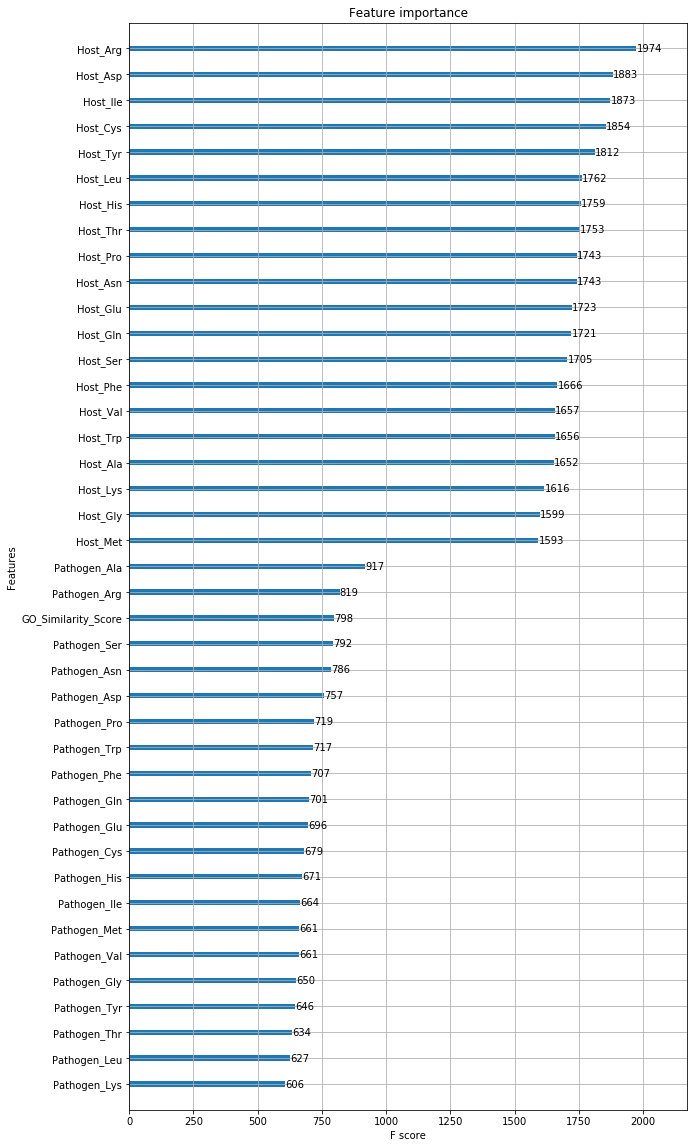

In [3]:
#Check for overfitting using binary:logistic instead of reg:linear
#source https://xgboost.readthedocs.io/en/latest/get_started.html
#Parameter source: https://xgboost.readthedocs.io/en/latest/parameter.html
start = time.time()
bst=None;
for depth in  range(1, 21):
        
        for num_boost in xrange(0,101,10):

            dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
            dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
            # specify parameters via map
            #param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
            param = {'silent':1,'max_depth':depth, 'objective':'binary:logistic'}
            num_round = num_boost
            bst = xgb.train(param, dtrain, num_round)
            # make prediction
            predictions = bst.predict(dtest)

           

            


            #print(confusion_matrix(test_labels,predictions.round()))  
            #print(classification_report(test_labels,predictions.round()))  


            # Model Accuracy, how often is the classifier correct?
            print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()), " Max_dept=:",depth, " num_boost=:",num_boost)
            #print("Max_dept=:",depth)
            #print("num_boost=:",num_boost)
            print
            
end = time.time()
print(round(end - start,2)," seconds elapsed")
# plot feature importance on last iteration
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [2]:
#Check for overfitting using random forest
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for depth in xrange(1, 22,3):
    
    for trees in xrange(1,108,15):


        rf = RandomForestRegressor(n_estimators = trees, random_state = 42, max_depth=depth)
        # Train the model on training data
        rf.fit(train_features, train_labels);


        # Use the forest's predict method on the test data
        predictions = rf.predict(test_features)

        #calcualte the accuracy
        accuracy = sum(predictions.round() == test_labels)/test_labels.size
        # Print out the Accuracy
        #print('Accuracy:', 100*round(accuracy, 4), '%.')




        #print(confusion_matrix(test_labels,predictions.round()))  
        #print(classification_report(test_labels,predictions.round()))  


        # Model Accuracy, how often is the classifier correct?
        print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round())," Max_dept=:",depth, " n_estimators=:",trees)
        print

end = time.time()

print(round(end - start,2)," seconds elapsed")

# Get numerical feature importances on last iteration
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))






('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 1)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 16)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 31)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 46)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 61)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 76)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 91)

('Accuracy:', 0.32748538011695905, ' Max_dept=:', 1, ' n_estimators=:', 106)

('Accuracy:', 0.4853801169590643, ' Max_dept=:', 4, ' n_estimators=:', 1)

('Accuracy:', 0.4853801169590643, ' Max_dept=:', 4, ' n_estimators=:', 16)

('Accuracy:', 0.4873294346978557, ' Max_dept=:', 4, ' n_estimators=:', 31)

('Accuracy:', 0.4697855750487329, ' Max_dept=:', 4, ' n_estimators=:', 46)

('Accuracy:', 0.47173489278752434, ' Max_dept=:', 4, ' n_estimators=:', 61)

('Ac

(1.79, ' seconds elapsed')
[[ 90 194]
 [ 90 139]]
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       284
           1       0.42      0.61      0.49       229

   micro avg       0.45      0.45      0.45       513
   macro avg       0.46      0.46      0.44       513
weighted avg       0.46      0.45      0.44       513

('Accuracy:', 0.44639376218323584)


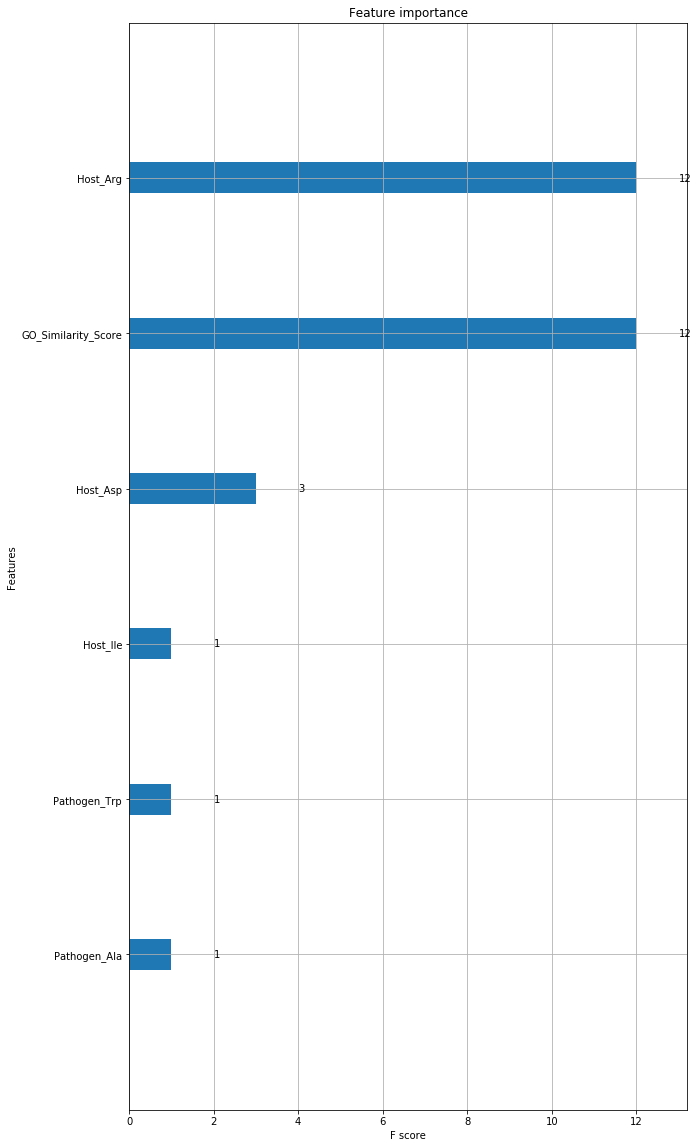

In [12]:
#more overfitting check(s)
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
param = {'max_depth':2, 'eta':0.1, 'silent':1, 'objective':'binary:logistic' }
#param = {'max_depth':10,'objective':'reg:logistic', 'eta':0.1, 'silent':1 }
#param = {'silent':1}
num_round = 10
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance - 
#code refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# reference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()